# Phân tích tỷ lệ giữ chân khách hàng (Cohort analysis)

## Phân tích tỷ lệ giữ chân khách hàng dựa trên số lần đặt hàng

Nhập các thư viện và bảng dữ liệu cần thiết

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

In [3]:
#nhập dữ liệu
orders_data= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/orders.csv')
orders_data.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,1,1,Returned,Male,2019-06-04 10:10:00 UTC,2019-06-08 20:53:00 UTC,2019-06-05 17:14:00 UTC,2019-06-08 15:55:00 UTC,2
1,2,2,Processing,Female,2022-05-23 14:42:00 UTC,NaN,NaN,NaN,1
2,3,3,Complete,Male,2020-06-20 15:09:00 UTC,NaN,2020-06-21 12:14:00 UTC,2020-06-24 17:28:00 UTC,3
3,4,3,Complete,Male,2021-08-23 15:09:00 UTC,NaN,2021-08-26 07:58:00 UTC,2021-08-26 14:46:00 UTC,3
4,5,3,Shipped,Male,2021-07-01 15:09:00 UTC,NaN,2021-07-03 11:21:00 UTC,NaN,1


In [4]:
#chuyển dữ liệu thành dạng datetime
orders_data['created_at']= orders_data['created_at'].str.slice(0,18)
orders_data['created_at']= pd.to_datetime(orders_data['created_at'], format='%Y-%m-%d %H:%M:%S')

In [5]:
#tạo cột order_month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
orders_data['order_month']= orders_data['created_at'].apply(get_month)
orders_data.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item,order_month
0,1,1,Returned,Male,2019-06-04 10:10:00,2019-06-08 20:53:00 UTC,2019-06-05 17:14:00 UTC,2019-06-08 15:55:00 UTC,2,2019-06-01
1,2,2,Processing,Female,2022-05-23 14:42:00,NaN,NaN,NaN,1,2022-05-01
2,3,3,Complete,Male,2020-06-20 15:09:00,NaN,2020-06-21 12:14:00 UTC,2020-06-24 17:28:00 UTC,3,2020-06-01
3,4,3,Complete,Male,2021-08-23 15:09:00,NaN,2021-08-26 07:58:00 UTC,2021-08-26 14:46:00 UTC,3,2021-08-01
4,5,3,Shipped,Male,2021-07-01 15:09:00,NaN,2021-07-03 11:21:00 UTC,NaN,1,2021-07-01


Cohort month là tháng đầu tiên mà khách hàng thực hiện việc đặt hàng

In [6]:
#tạo cột cohort_month
orders_data['cohort_month']= orders_data.groupby('cus_id')['order_month'].transform(min)
orders_data.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item,order_month,cohort_month
0,1,1,Returned,Male,2019-06-04 10:10:00,2019-06-08 20:53:00 UTC,2019-06-05 17:14:00 UTC,2019-06-08 15:55:00 UTC,2,2019-06-01,2019-06-01
1,2,2,Processing,Female,2022-05-23 14:42:00,NaN,NaN,NaN,1,2022-05-01,2022-05-01
2,3,3,Complete,Male,2020-06-20 15:09:00,NaN,2020-06-21 12:14:00 UTC,2020-06-24 17:28:00 UTC,3,2020-06-01,2020-06-01
3,4,3,Complete,Male,2021-08-23 15:09:00,NaN,2021-08-26 07:58:00 UTC,2021-08-26 14:46:00 UTC,3,2021-08-01,2020-06-01
4,5,3,Shipped,Male,2021-07-01 15:09:00,NaN,2021-07-03 11:21:00 UTC,NaN,1,2021-07-01,2020-06-01


Cohort index là chỉ số thể hiện khoảng cách giữa tháng mà khách hàng đặt hàng so với tháng đầu tiên họ đã đặt hàng (cohort month). Được tính bằng công thức: chênh lệch giữa order month và cohort month cộng thêm 1.

In [7]:
#tạo function để tính cohort_index
def get_date_elements(df, column):
    day= df[column].dt.day
    month= df[column].dt.month
    year= df[column].dt.year
    return day, month, year

In [24]:
#áp dụng function vừa tạo
_, order_month, order_year= get_date_elements(orders_data, 'order_month')
_, cohort_month, cohort_year= get_date_elements(orders_data, 'cohort_month')

In [9]:
#tạo cột cohort_index
year_diff= order_year - cohort_year
month_diff= order_month - cohort_month
orders_data['cohort_index']= year_diff*12 + month_diff + 1
orders_data.head()

,order_id,cus_id,status,sex,created_at,returned_at,shipped_at,delivered_at,num_of_item,order_month,cohort_month,cohort_index
0,1,1,Returned,Male,2019-06-04 10:10:00,2019-06-08 20:53:00 UTC,2019-06-05 17:14:00 UTC,2019-06-08 15:55:00 UTC,2,2019-06-01,2019-06-01,1
1,2,2,Processing,Female,2022-05-23 14:42:00,NaN,NaN,NaN,1,2022-05-01,2022-05-01,1
2,3,3,Complete,Male,2020-06-20 15:09:00,NaN,2020-06-21 12:14:00 UTC,2020-06-24 17:28:00 UTC,3,2020-06-01,2020-06-01,1
3,4,3,Complete,Male,2021-08-23 15:09:00,NaN,2021-08-26 07:58:00 UTC,2021-08-26 14:46:00 UTC,3,2021-08-01,2020-06-01,15
4,5,3,Shipped,Male,2021-07-01 15:09:00,NaN,2021-07-03 11:21:00 UTC,NaN,1,2021-07-01,2020-06-01,14


In [10]:
#đếm số lượng cus_id
cohort_data= orders_data.groupby(['cohort_month','cohort_index'])['cus_id'].nunique()
cohort_data= cohort_data.reset_index()

In [11]:
#tạo ma trận cohort_table
cohort_table= cohort_data.pivot(index= 'cohort_month', columns= ['cohort_index'], values= 'cus_id')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
cohort_month,,,,,,,,,,,,,,,,,,,,,
2019-01-01,29.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,...,2.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0
2019-02-01,100.0,3.0,3.0,5.0,2.0,3.0,2.0,2.0,NaN,1.0,...,1.0,2.0,3.0,NaN,2.0,2.0,3.0,7.0,1.0,3.0
2019-03-01,173.0,6.0,3.0,9.0,3.0,5.0,NaN,5.0,3.0,9.0,...,4.0,2.0,7.0,3.0,7.0,2.0,3.0,4.0,5.0,NaN
2019-04-01,222.0,2.0,6.0,9.0,8.0,3.0,8.0,7.0,3.0,10.0,...,4.0,3.0,13.0,12.0,7.0,8.0,5.0,7.0,NaN,NaN
2019-05-01,298.0,11.0,9.0,4.0,10.0,9.0,6.0,6.0,8.0,7.0,...,12.0,5.0,6.0,4.0,13.0,9.0,14.0,2.0,NaN,NaN
2019-06-01,397.0,7.0,14.0,6.0,9.0,13.0,12.0,12.0,9.0,13.0,...,8.0,11.0,10.0,12.0,6.0,7.0,4.0,NaN,NaN,NaN
2019-07-01,490.0,11.0,15.0,7.0,10.0,14.0,7.0,11.0,10.0,18.0,...,16.0,20.0,15.0,7.0,12.0,8.0,NaN,NaN,NaN,NaN
2019-08-01,541.0,23.0,15.0,17.0,15.0,18.0,18.0,17.0,17.0,13.0,...,12.0,11.0,6.0,13.0,2.0,NaN,NaN,NaN,NaN,NaN
2019-09-01,601.0,22.0,12.0,17.0,17.0,17.0,16.0,21.0,17.0,12.0,...,14.0,18.0,18.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_month'>

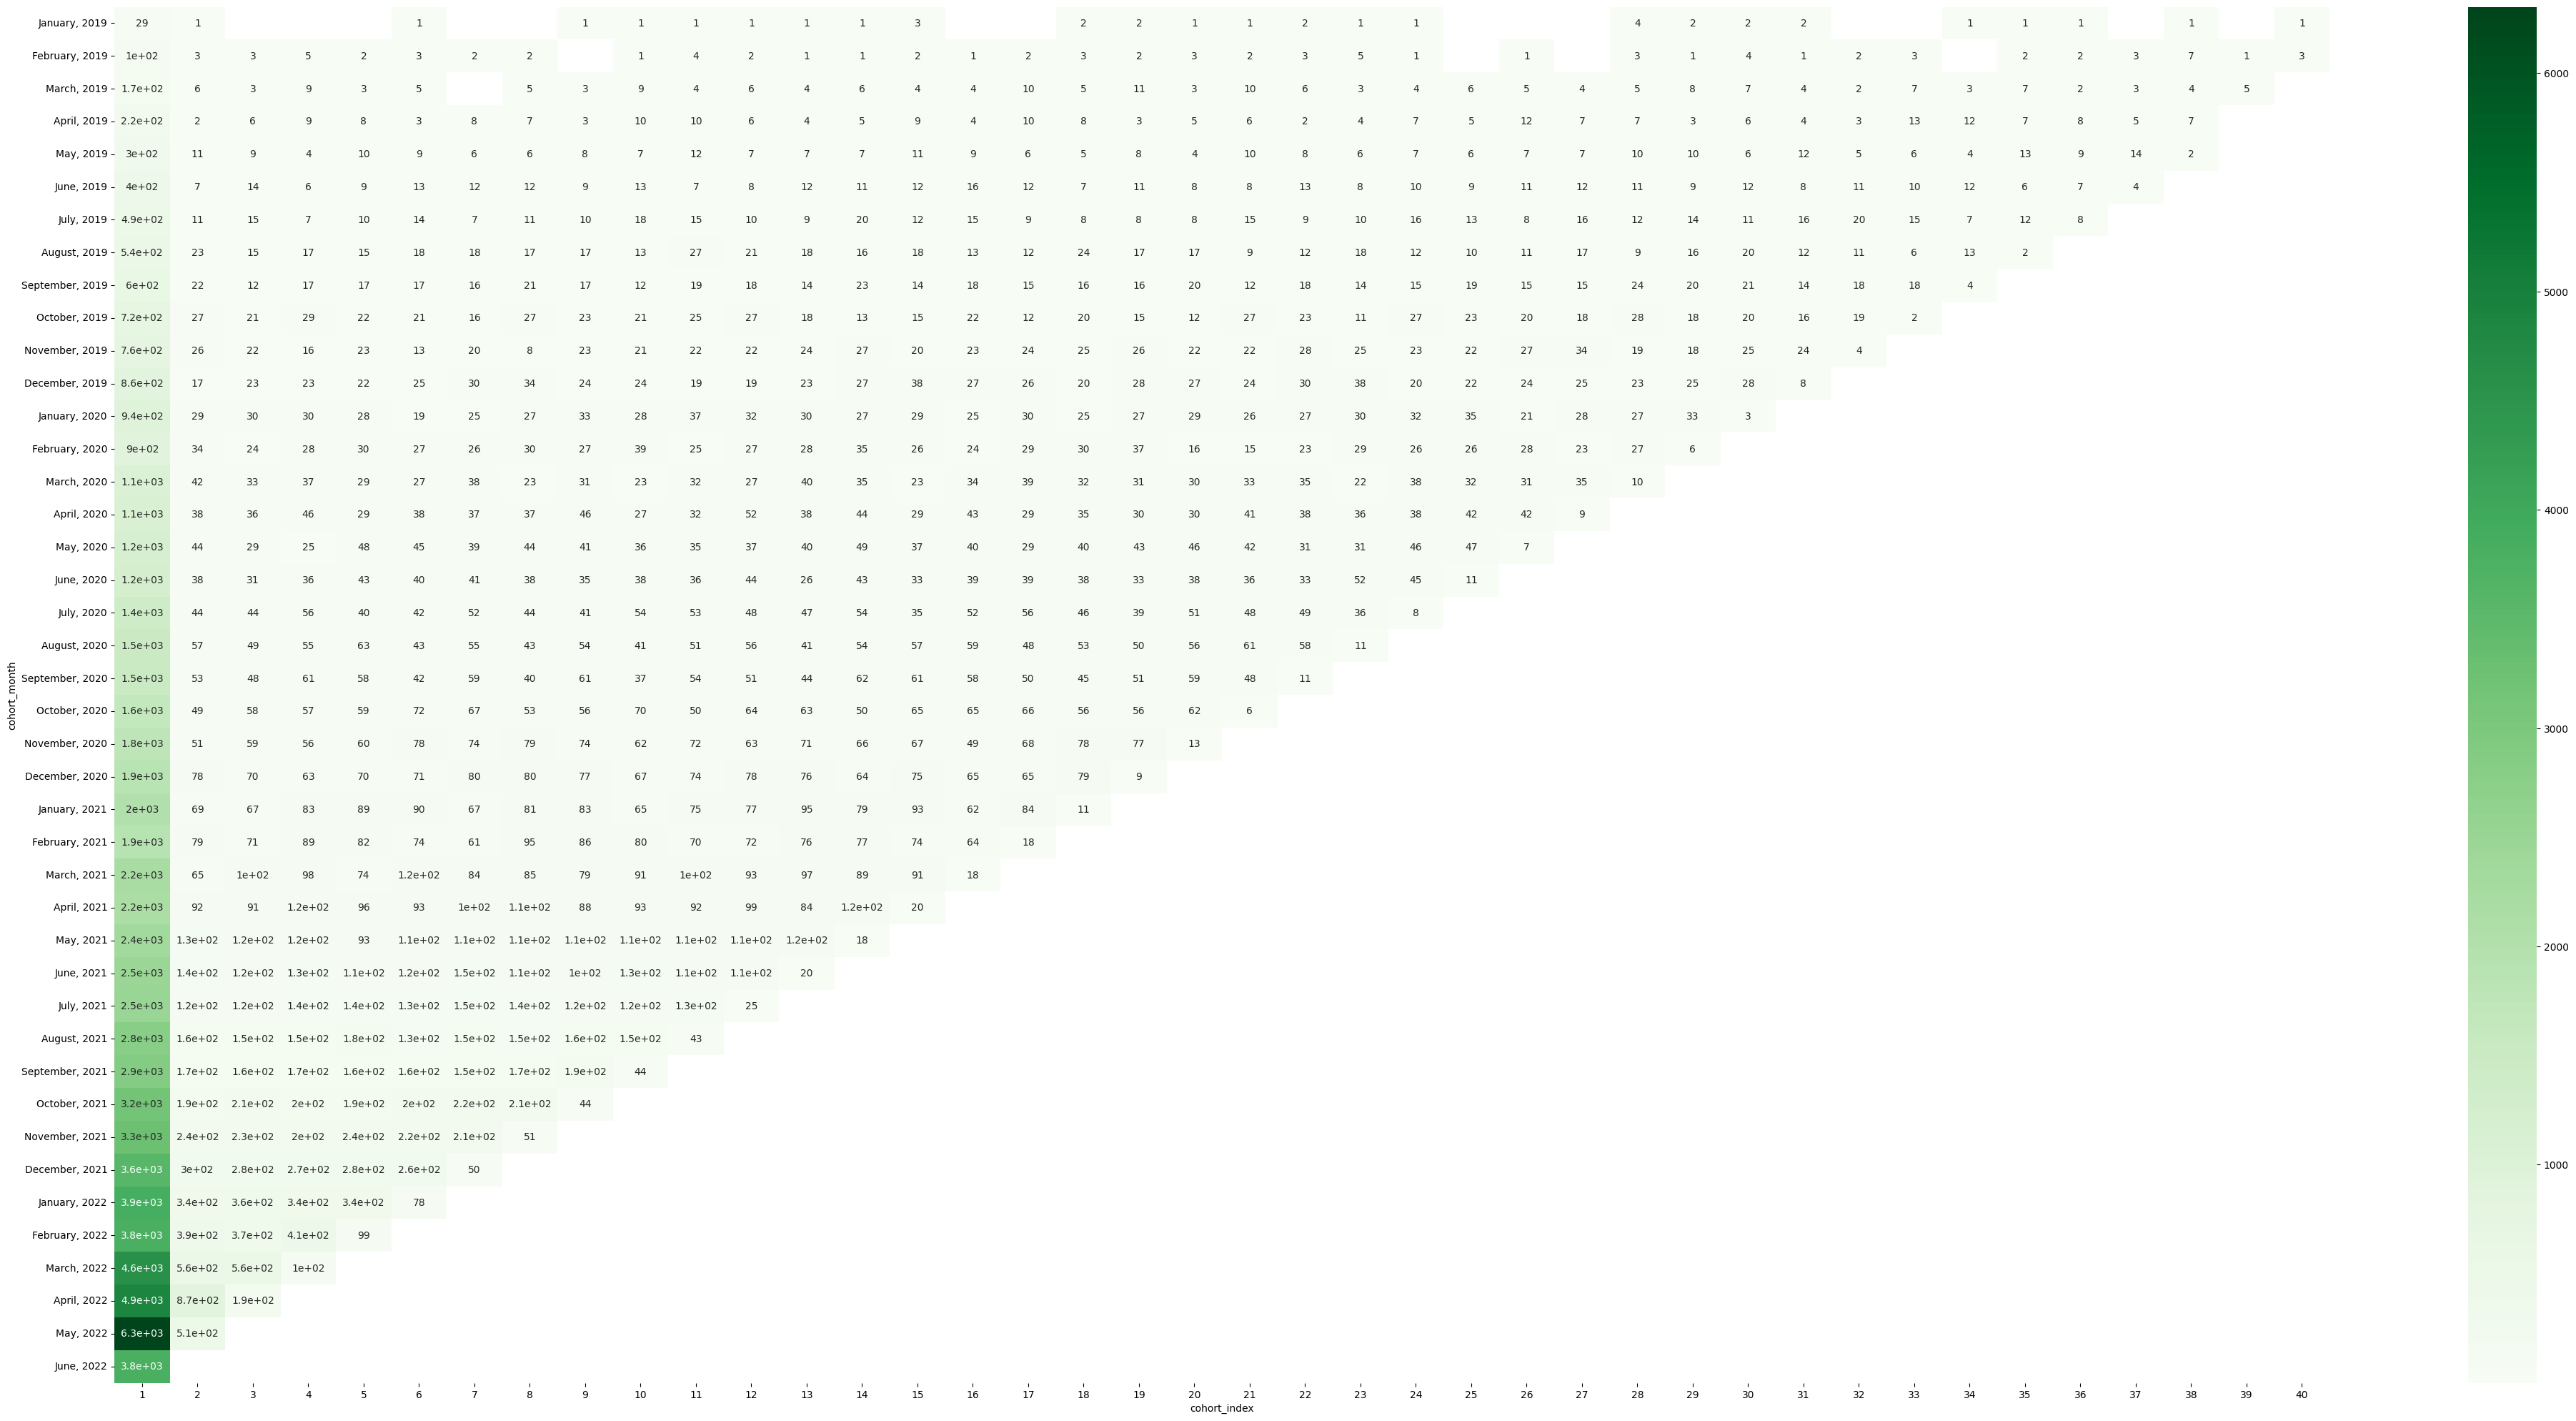

In [12]:
cohort_table.index= cohort_table.index.strftime('%B, %Y')
#tạo biểu đồ nhiệt
plt.figure(figsize=(50,25))
sns.heatmap(cohort_table, annot=True, cmap= 'Greens')

Số lượng khách hàng mới tăng ổn định từ tháng 1-2019 đến tháng 6-2022. Tuy nhiên, số lượng khách hàng quay lại thấp ở giai đoạn từ 1-2019 đến 4-2021, nhưng những tháng sau đó, số lượng quay lại mới bắt đầu tăng.

In [25]:
# tính cohort theo tỷ lệ phần trăm (%)
cohort_per= cohort_table.divide(cohort_table.iloc[:,0], axis=0)
cohort_per

cohort_index,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
cohort_month,,,,,,,,,,,,,,,,,,,,,
"January, 2019",1.0,0.034483,NaN,NaN,NaN,0.034483,NaN,NaN,0.034483,0.034483,...,0.068966,NaN,NaN,0.034483,0.034483,0.034483,NaN,0.034483,NaN,0.034483
"February, 2019",1.0,0.030000,0.030000,0.050000,0.020000,0.030000,0.020000,0.020000,NaN,0.010000,...,0.010000,0.020000,0.030000,NaN,0.020000,0.020000,0.030000,0.070000,0.010000,0.030000
"March, 2019",1.0,0.034682,0.017341,0.052023,0.017341,0.028902,NaN,0.028902,0.017341,0.052023,...,0.023121,0.011561,0.040462,0.017341,0.040462,0.011561,0.017341,0.023121,0.028902,NaN
"April, 2019",1.0,0.009009,0.027027,0.040541,0.036036,0.013514,0.036036,0.031532,0.013514,0.045045,...,0.018018,0.013514,0.058559,0.054054,0.031532,0.036036,0.022523,0.031532,NaN,NaN
"May, 2019",1.0,0.036913,0.030201,0.013423,0.033557,0.030201,0.020134,0.020134,0.026846,0.023490,...,0.040268,0.016779,0.020134,0.013423,0.043624,0.030201,0.046980,0.006711,NaN,NaN
"June, 2019",1.0,0.017632,0.035264,0.015113,0.022670,0.032746,0.030227,0.030227,0.022670,0.032746,...,0.020151,0.027708,0.025189,0.030227,0.015113,0.017632,0.010076,NaN,NaN,NaN
"July, 2019",1.0,0.022449,0.030612,0.014286,0.020408,0.028571,0.014286,0.022449,0.020408,0.036735,...,0.032653,0.040816,0.030612,0.014286,0.024490,0.016327,NaN,NaN,NaN,NaN
"August, 2019",1.0,0.042514,0.027726,0.031423,0.027726,0.033272,0.033272,0.031423,0.031423,0.024030,...,0.022181,0.020333,0.011091,0.024030,0.003697,NaN,NaN,NaN,NaN,NaN
"September, 2019",1.0,0.036606,0.019967,0.028286,0.028286,0.028286,0.026622,0.034942,0.028286,0.019967,...,0.023295,0.029950,0.029950,0.006656,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_month'>

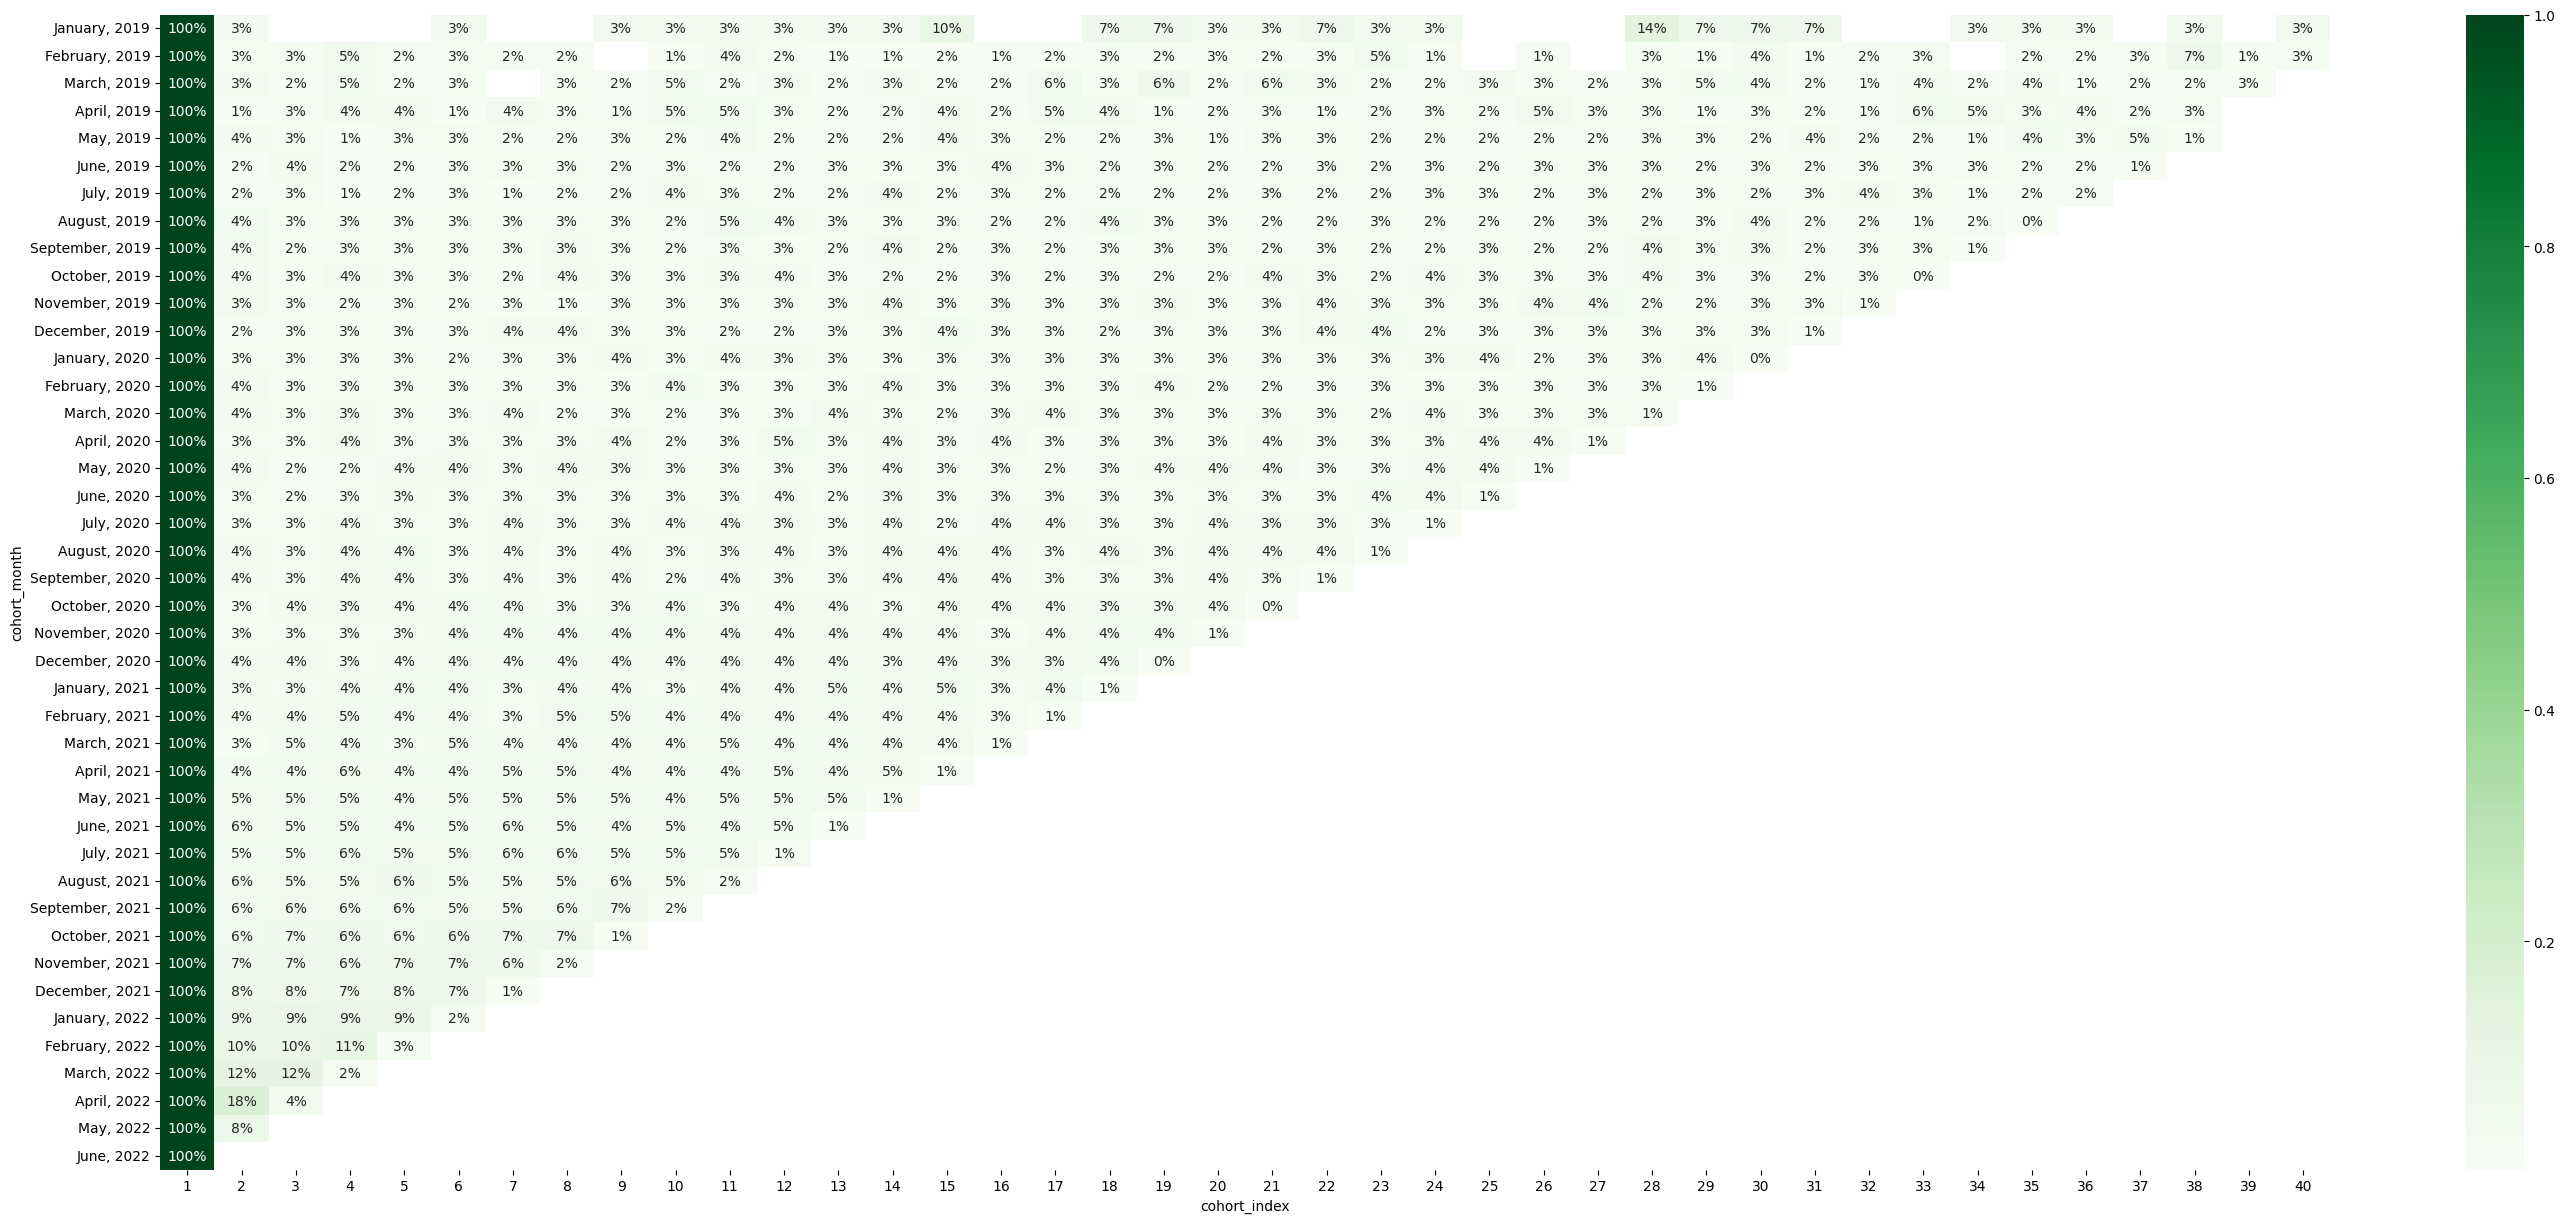

In [14]:
#vẽ biểu đồ nhiệt
plt.figure(figsize=(35,15))
sns.heatmap(cohort_per, annot=True, cmap= 'Greens', fmt='.0%')

Với tỷ lệ giữ chân khách hàng dao động trong khoảng 1%-4% (từ tháng 1-2019 đến 4-2021), doanh nghiệp có tỷ lệ giữ chân khách hàng thấp hơn trung bình ngành TMDT - trung bình 7%. Từ tháng 4-2021, tỷ lệ giữ chân bắt đầu có xu hướng tăng, thể hiện sự khởi sắc trong tình hình kinh doanh

## Phân tích giá trị mà lượng khách hàng quay lại mang đến cho doanh nghiệp

In [15]:
#nhập bảng order_details
ordersdetai_data= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/order_details.csv')
ordersdetai_data.head()

,id,order_id,item_id,inventory_id,sale_price
0,15721,10826,13606,42278,2.5
1,19167,13243,13606,51560,2.5
2,77007,53140,13606,207367,2.5
3,151639,104681,13606,408715,2.5
4,170817,117931,13606,460556,2.5


In [16]:
#join 2 bảng orders và order_details bằng trường order_id
merged_table = pd.merge(orders_data, ordersdetai_data, on='order_id')[['order_id','cus_id','status','num_of_item','order_month','cohort_month','cohort_index','sale_price']]
merged_table.head()

,order_id,cus_id,status,num_of_item,order_month,cohort_month,cohort_index,sale_price
0,1,1,Returned,2,2019-06-01,2019-06-01,1,9.000000
1,1,1,Returned,2,2019-06-01,2019-06-01,1,54.990002
2,2,2,Processing,1,2022-05-01,2022-05-01,1,58.990002
3,3,3,Complete,3,2020-06-01,2020-06-01,1,25.000000
4,3,3,Complete,3,2020-06-01,2020-06-01,1,28.500000


In [17]:
#thêm cột doanh thu
merged_table['revenue']= merged_table['num_of_item']*merged_table['sale_price']
merged_table.head()

,order_id,cus_id,status,num_of_item,order_month,cohort_month,cohort_index,sale_price,revenue
0,1,1,Returned,2,2019-06-01,2019-06-01,1,9.000000,18.000000
1,1,1,Returned,2,2019-06-01,2019-06-01,1,54.990002,109.980003
2,2,2,Processing,1,2022-05-01,2022-05-01,1,58.990002,58.990002
3,3,3,Complete,3,2020-06-01,2020-06-01,1,25.000000,75.000000
4,3,3,Complete,3,2020-06-01,2020-06-01,1,28.500000,85.500000


In [18]:
#lọc ra trạng thái đơn hàng đã hoàn thành
filtered_table = merged_table[merged_table['status'] == 'Complete']
filtered_table.head()

,order_id,cus_id,status,num_of_item,order_month,cohort_month,cohort_index,sale_price,revenue
3,3,3,Complete,3,2020-06-01,2020-06-01,1,25.000000,75.000000
4,3,3,Complete,3,2020-06-01,2020-06-01,1,28.500000,85.500000
5,3,3,Complete,3,2020-06-01,2020-06-01,1,39.990002,119.970005
6,4,3,Complete,3,2021-08-01,2020-06-01,15,25.000000,75.000000
7,4,3,Complete,3,2021-08-01,2020-06-01,15,48.650002,145.950005


In [19]:
#tính tổng doanh thu
cohort_revenue= filtered_table.groupby(['cohort_month','cohort_index'])['revenue'].sum()
cohort_revenue= cohort_revenue.reset_index()

In [20]:
cohort_table1= cohort_revenue.pivot(index= 'cohort_month', columns= ['cohort_index'], values= 'revenue')
cohort_table1

cohort_index,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
cohort_month,,,,,,,,,,,,,,,,,,,,,
2019-01-01,648.939999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.700001,130.000000,...,1346.580002,NaN,NaN,NaN,NaN,65.000000,NaN,22.500000,NaN,NaN
2019-02-01,5152.700027,NaN,347.000000,NaN,NaN,NaN,NaN,188.000000,NaN,NaN,...,182.000000,NaN,153.980000,NaN,64.990002,NaN,5.950000,59.980001,NaN,85.0
2019-03-01,5867.339996,58.000000,59.500000,268.379997,94.990002,NaN,NaN,12.000000,87.980000,720.000000,...,49.500000,NaN,95.880001,NaN,283.400000,NaN,198.000000,825.000015,40.0,NaN
2019-04-01,9518.510019,NaN,NaN,36.990002,68.459999,23.670000,128.900002,166.989998,NaN,1431.329994,...,174.899994,79.000000,445.000000,973.050007,24.950000,99.370003,99.000000,491.720001,NaN,NaN
2019-05-01,16293.849998,1083.970002,581.789997,NaN,466.879998,545.910002,779.910000,24.990000,125.910002,306.309996,...,649.449997,29.950001,NaN,25.000000,1871.319996,853.039993,1004.930000,NaN,NaN,NaN
2019-06-01,17192.970049,203.739998,215.979996,32.990002,39.450001,248.059999,570.179996,285.670002,200.070002,1040.940004,...,207.000000,12.980000,627.550008,653.150000,130.620001,41.990000,416.440001,NaN,NaN,NaN
2019-07-01,18130.950065,262.979996,1739.899998,38.000000,89.850000,1675.139996,119.990002,595.480000,347.699997,401.939999,...,985.310003,583.280014,464.790001,NaN,85.990002,221.700001,NaN,NaN,NaN,NaN
2019-08-01,23633.269972,452.830004,464.950001,237.450001,77.500000,1107.819998,1887.029994,124.480001,858.570009,240.210007,...,35.000000,197.450000,12.630000,168.959999,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,31745.249995,176.939999,537.199994,848.330009,413.690002,3066.270016,438.950005,922.490007,1254.980000,431.699999,...,1481.469994,444.500000,2018.819998,85.000000,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_month'>

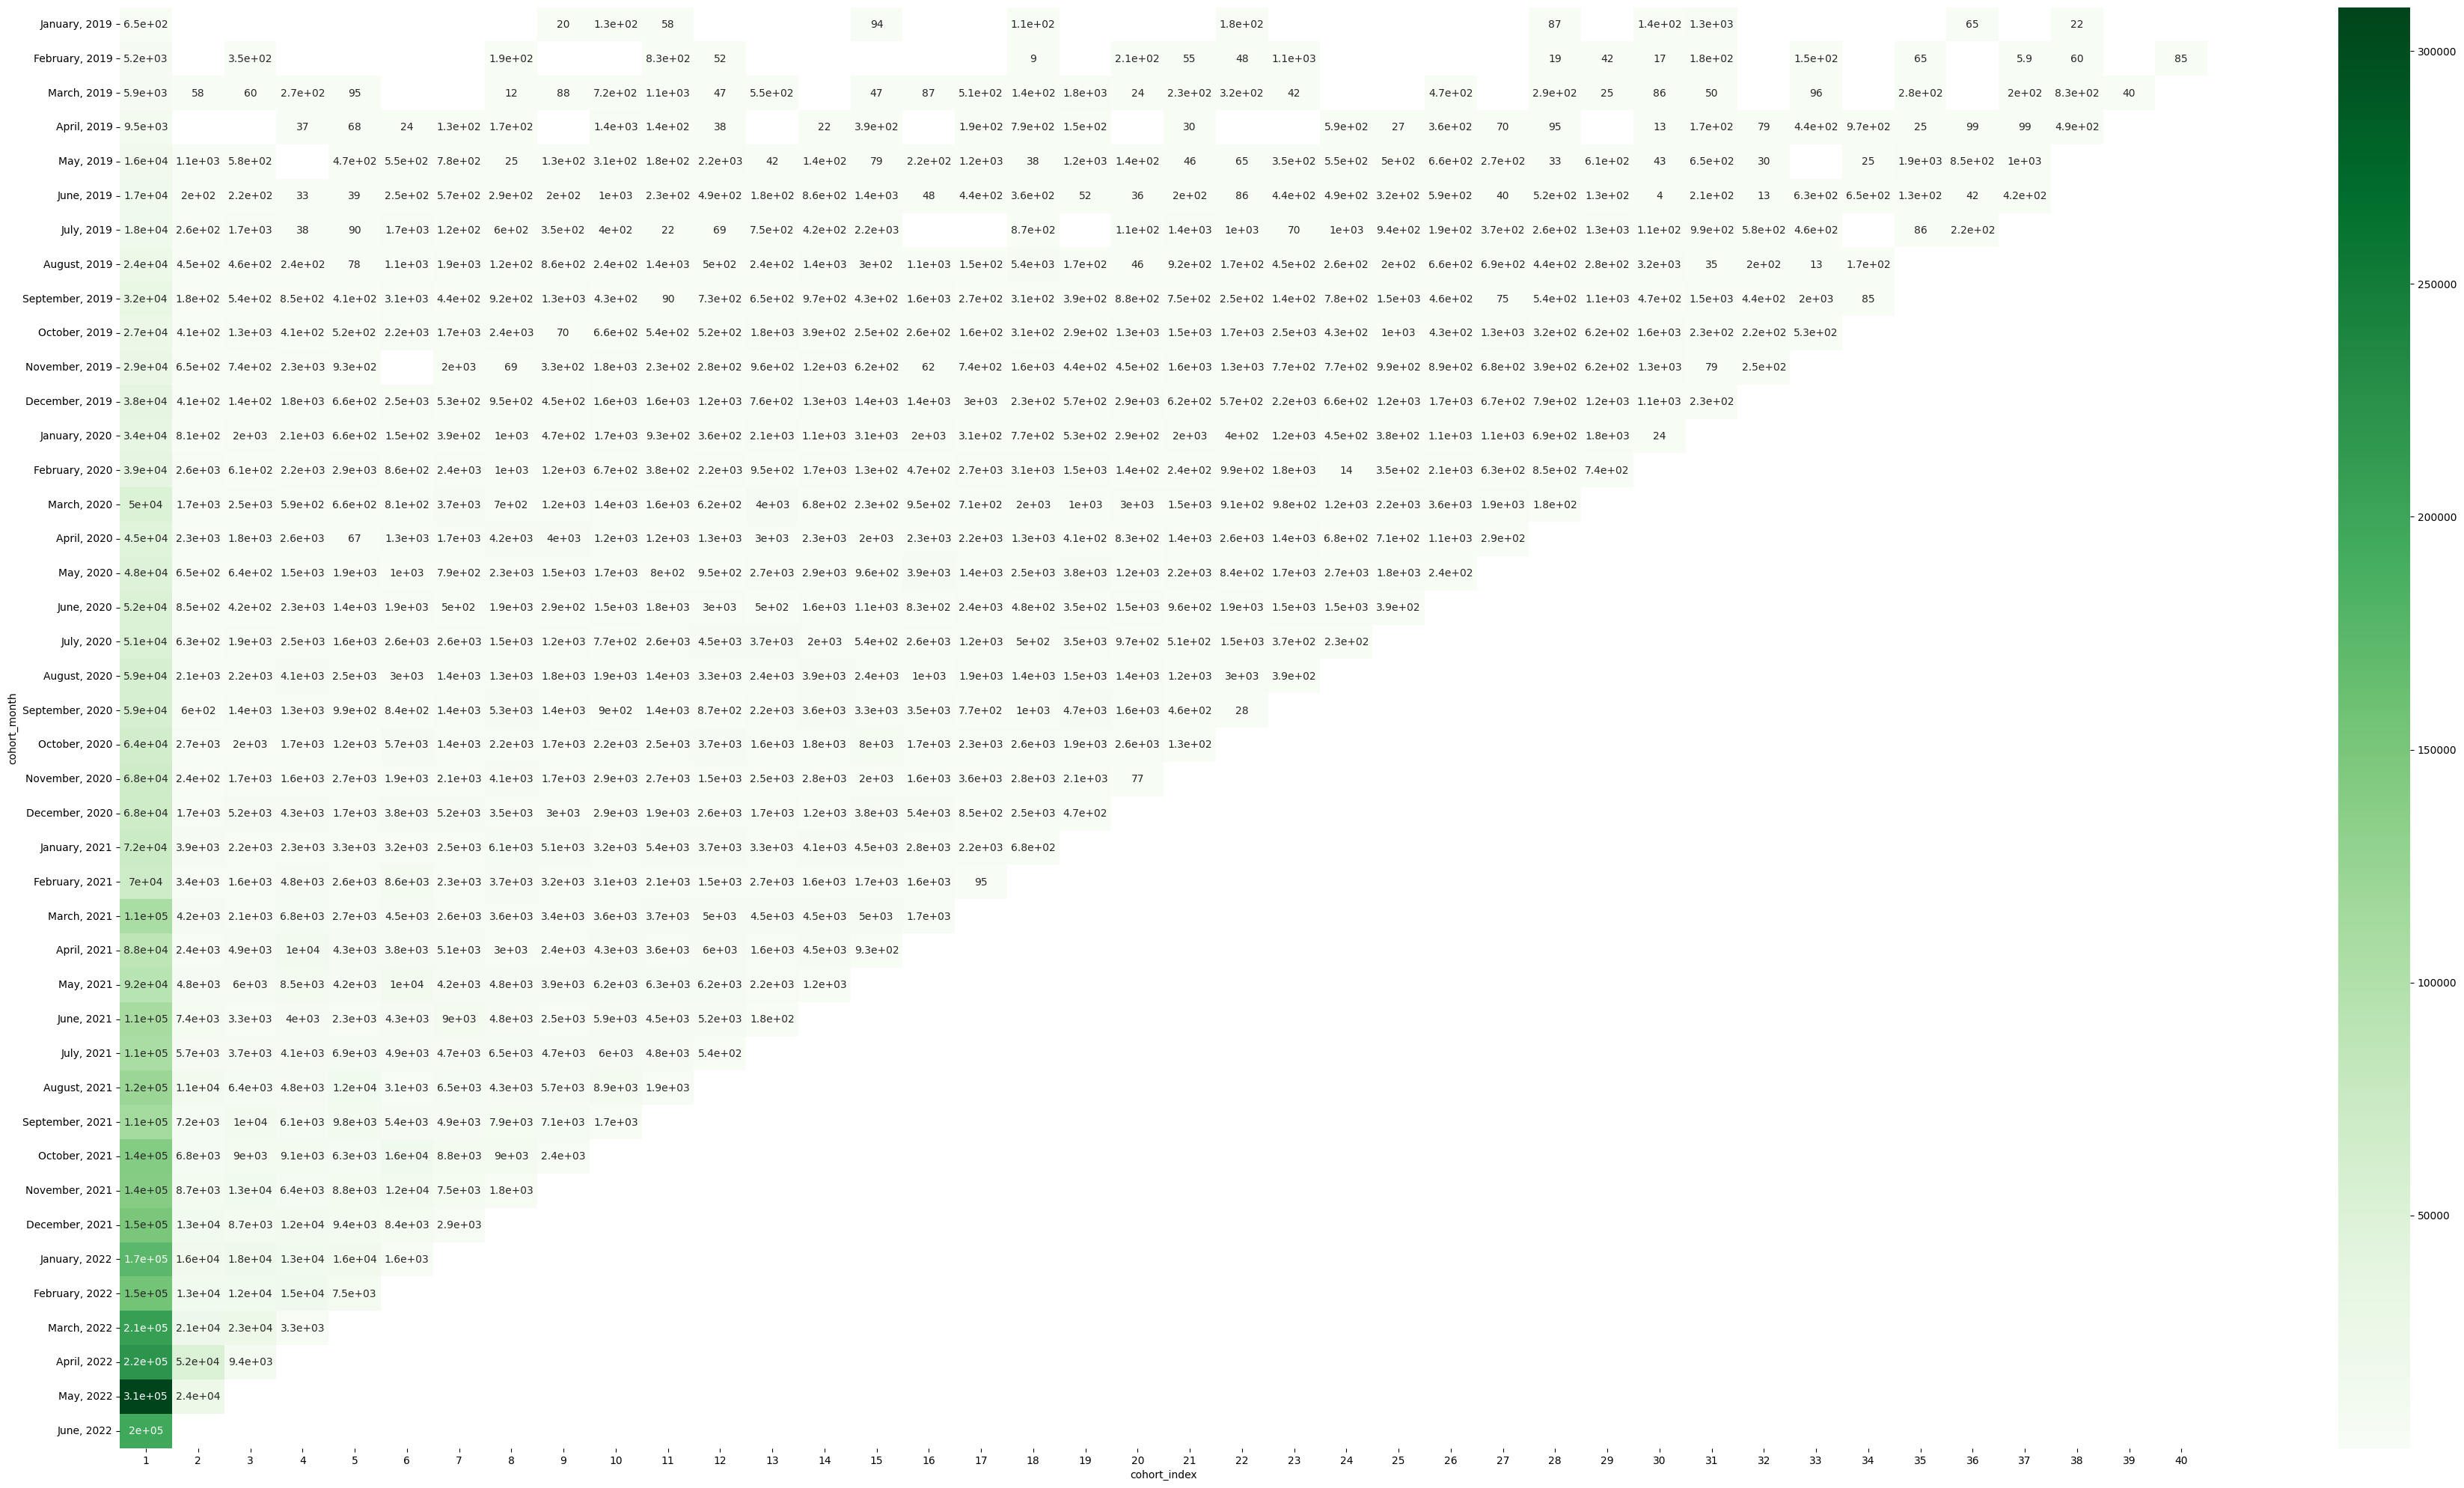

In [21]:
#vẽ biểu đồ nhiệt
cohort_table1.index= cohort_table1.index.strftime('%B, %Y')
plt.figure(figsize=(45,25))
sns.heatmap(cohort_table1, annot=True, cmap= 'Greens')

In [22]:
#tính phần trăm doanh thu
cohort_per1= cohort_table1.divide(cohort_table1.iloc[:,0], axis=0)

<Axes: xlabel='cohort_index', ylabel='cohort_month'>

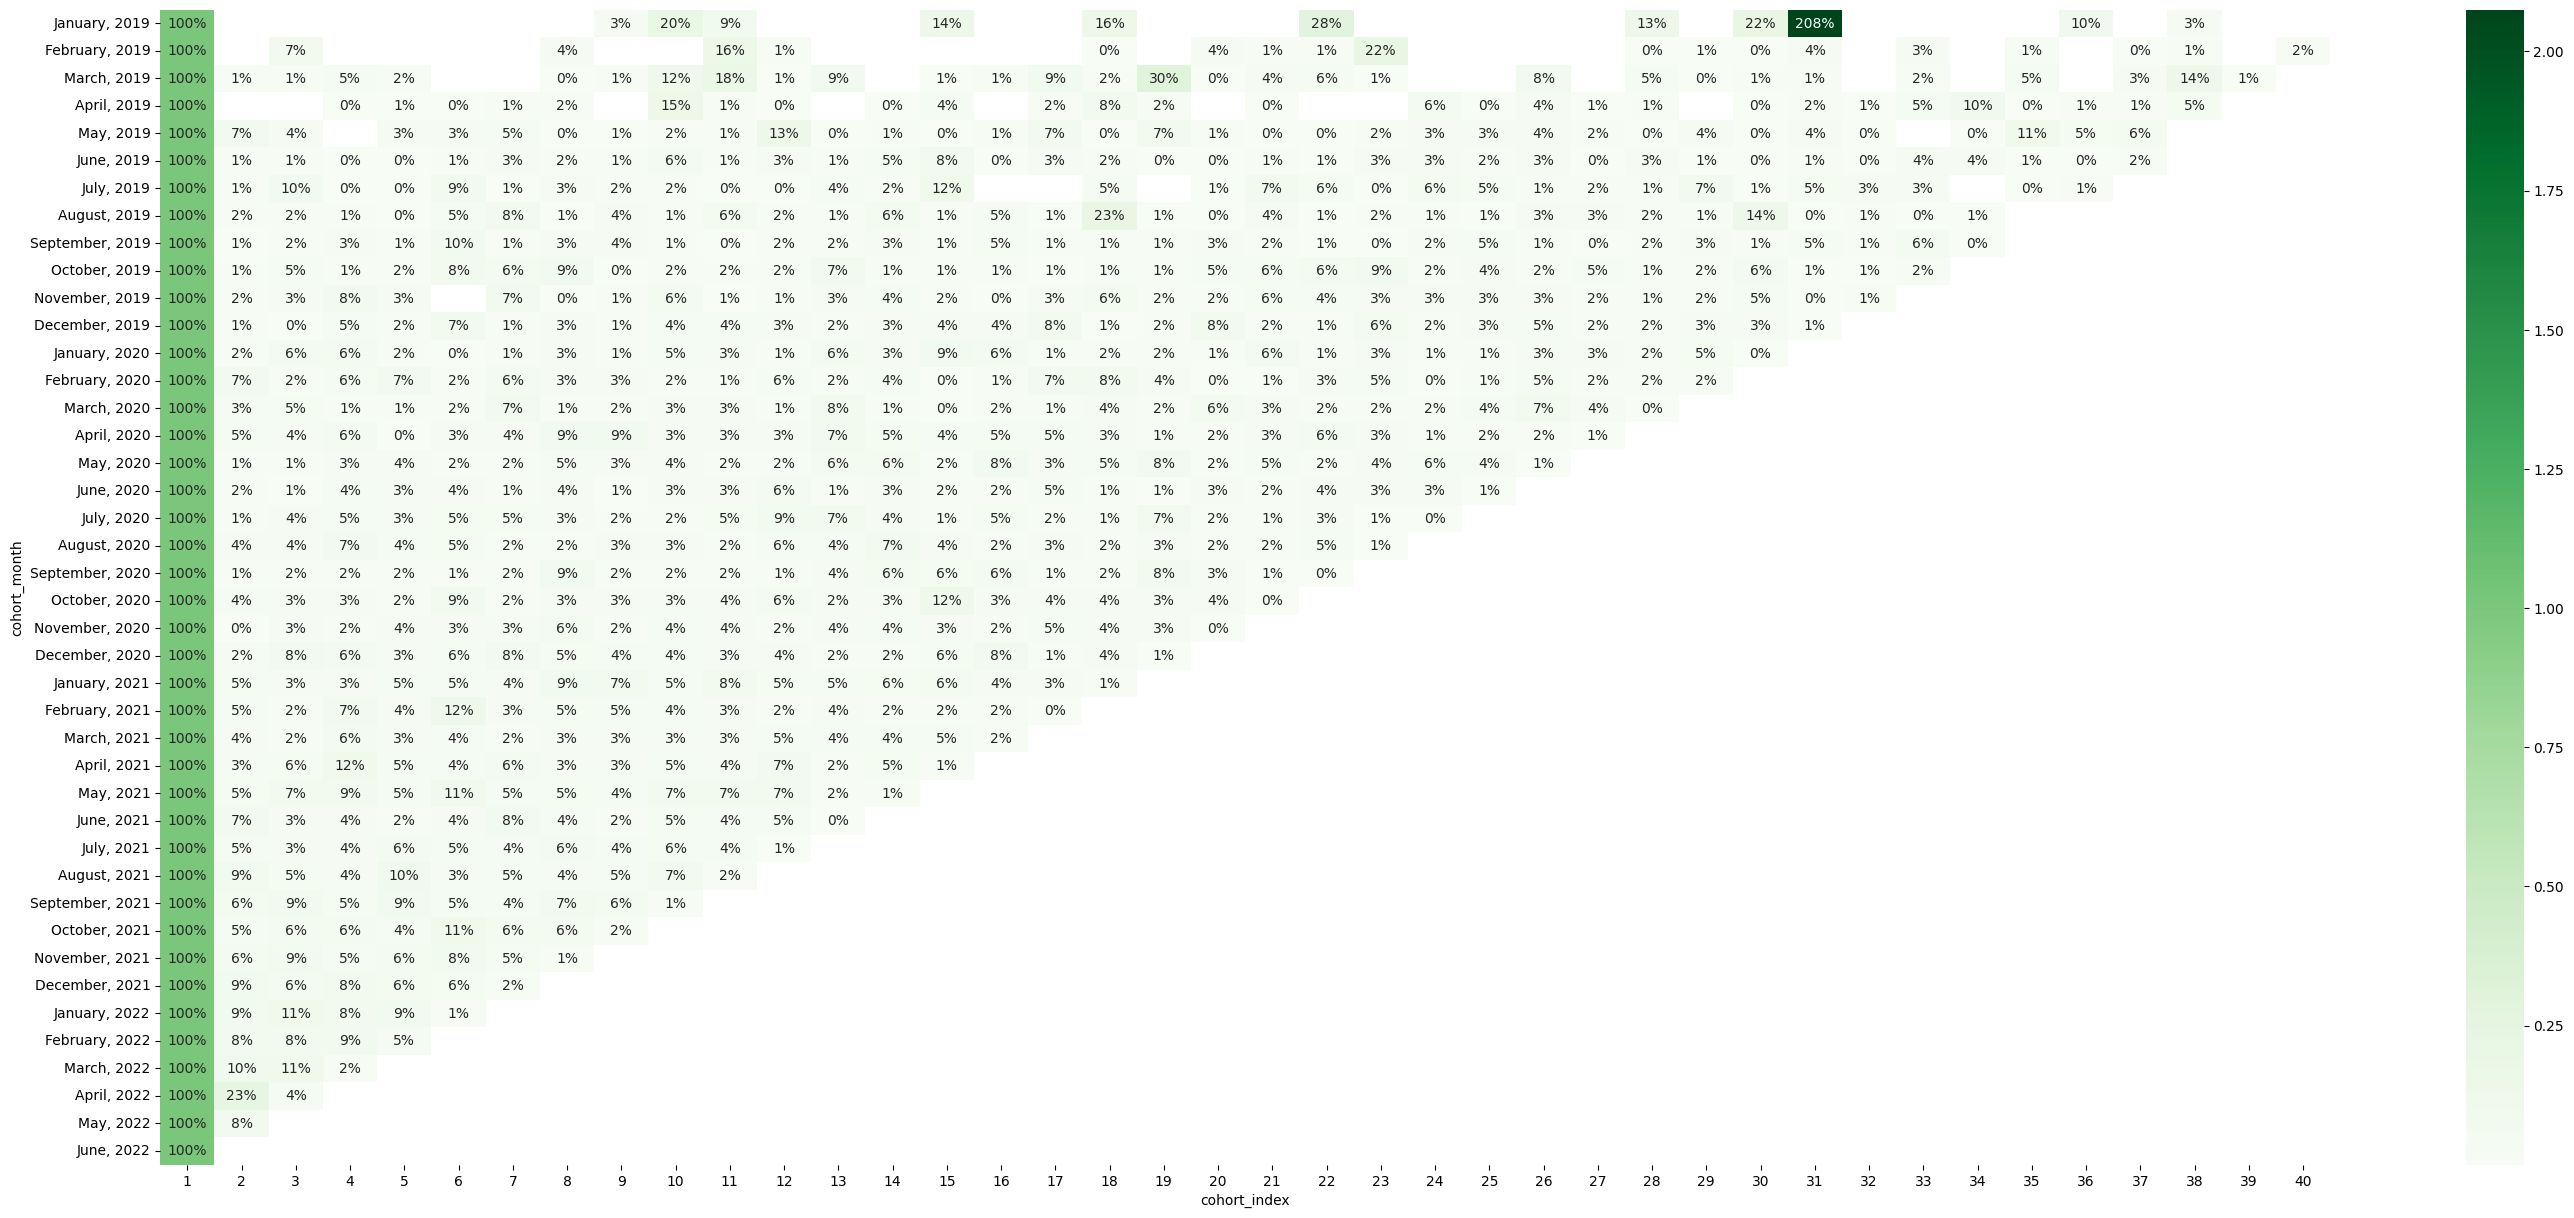

In [23]:
#vẽ đồ thị nhiệt
plt.figure(figsize=(35,15))
sns.heatmap(cohort_per1, annot=True, cmap= 'Greens', fmt='.0%')